<a href="https://colab.research.google.com/github/Smediterranea/Arena_R_Code/blob/main/Copy_of_Heritability_and_QTL_tutorial_(no_answers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The goal of this tutorial is to help you build intuition for how QTL mapping works and get you familiar with some of
# the informatics and statistical challenges.

# QTL mapping involves finding regions of the genome that explain observable trait differences.

# I use real genotype data from our study https://pubmed.ncbi.nlm.nih.gov/23376951/ . These are a population of  ~1000 haploid
# recombinant progeny from a cross of the lab yeast (BY) and wine yeast (RM).

# The haploid are genotypes reconstructed from sequencing data. We will skip how that genotype reconstruction is done here.

# For my convenience for this tutorial, the phenotypes here are simulated.

# We focus here on understanding the data, doing some manipulations and visualizations in R

In [ ]:
#@title Environment setup
#some package setup
library(data.table)
library(tidyverse)

library(fields)
install.packages('fields')

#for heritability deep dive section, could comment out these 4 lines if not doing that
install.packages('lme4')
install.packages('regress')
library(lme4)
library(regress)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘dotCall64’, ‘gridExtra’, ‘spam’, ‘viridis’, ‘maps’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: spam

Spam version 2.9-1 (2022-08-07) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridis

Loading required package: viridisLite


Try help(fields) to get started.

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.

In [ ]:
#@title Load genotype data from BYxRM 1000 panel paper
#load 1000 BYxRM genotype data
load(url("http://genomics-pubs.princeton.edu/YeastCross_BYxRM/data/cross.Rdata"))
extractGenotype=function(impcross){ (do.call('cbind', sapply(impcross$geno, function(x) { x$data }))*2)-3 }
gdata = extractGenotype(cross)
#add a segregant name
rownames(gdata)=paste0('seg', 1:nrow(gdata))
#what are the dimensions of the matrix 'gdata'?
#BY=-1, RM=1

In [ ]:
#make a variable called nstrains that is the number of segregants


#make a variable callled nmarkers that is the number of markers


In [ ]:
#make a data frame that splits out the marker information
marker.info=data.frame(tstrsplit(colnames(gdata),'_'))
colnames(marker.info)=c('gcoord', 'chr', 'pos', 'BY_variant', 'RM_variant')
marker.info$gcoord=as.numeric(marker.info$gcoord)
marker.info$pos=as.numeric(marker.info$pos)

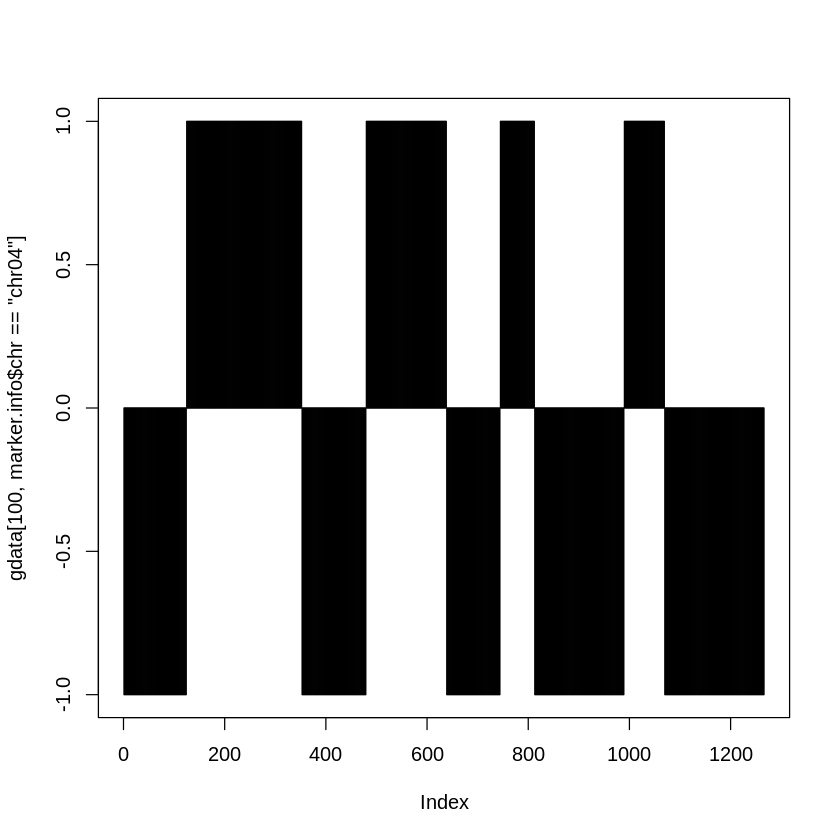

In [ ]:
#@title Visualize a segregant genotype
# plot the genotypes of the 100th segregant on chr04, hint use the parameter type='h'
# in the plot() function and just feed a vector of the marker genotypes on chr04 to plot()


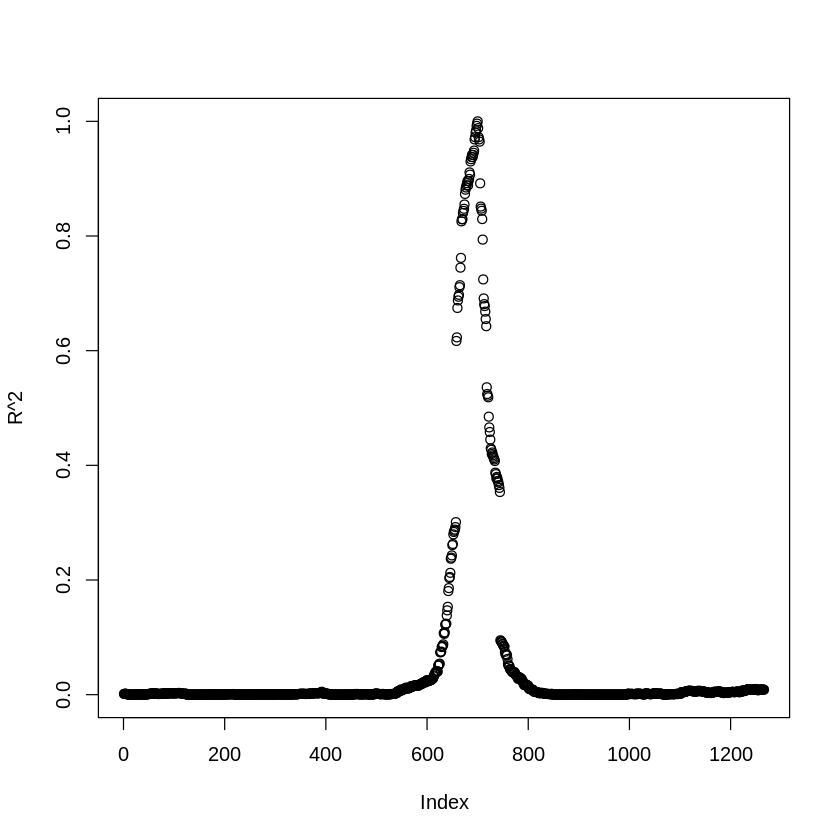

In [ ]:
#@title Visualize linkage disequilibrium (LD) between a marker and other markers on that chromosome
# A commonly used measurement of LD is Pearson's r^2. Calculate r^2 between the 700th marker on chr04 and all markers on chr04



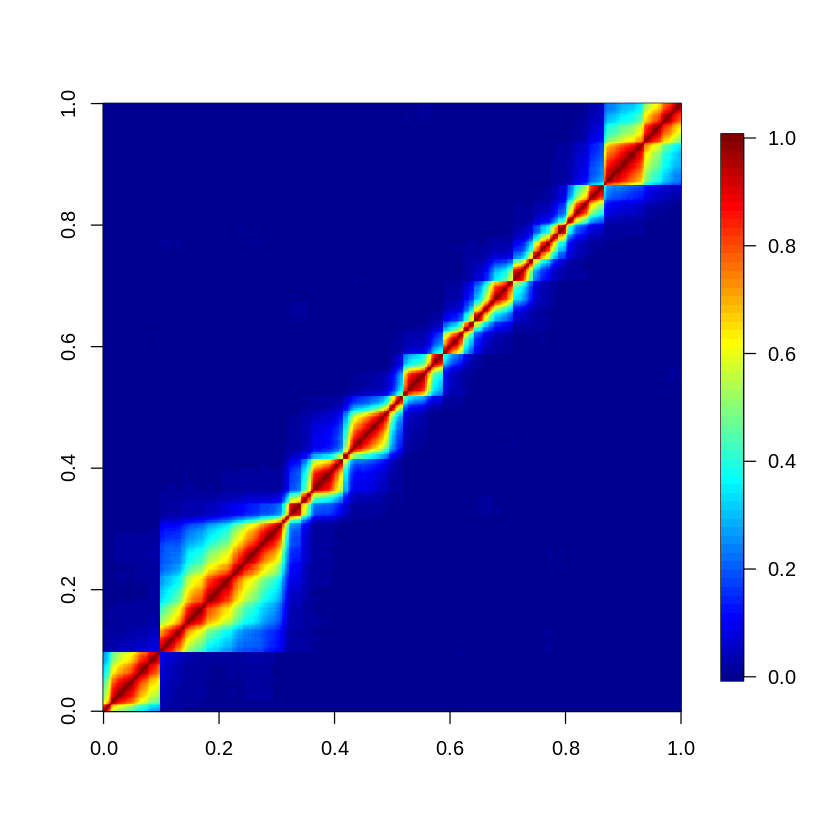

In [ ]:
#@title Visualize pairwise LD for all markers on a chromosome
# calculate LD as Pearson's R^2 between all pairs of markers on chr04, visualize using image.plot() from the fields package



In [ ]:
#@title Trait 1
#phenotype 1
pheno1=readRDS(url('https://github.com/joshsbloom/ComplexTraitTools/blob/main/VarianceComponents/simulations/pheno1.RDS?raw=true'))
#use str() to investigate the structure of pheno1
str(pheno1)
#the two columns correspond to two replicate measurements for a trait for each individual (individuals on the rows)

 num [1:1008, 1:2] 1.52 2.1 1.41 1.95 2.07 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "sim1" "sim2"


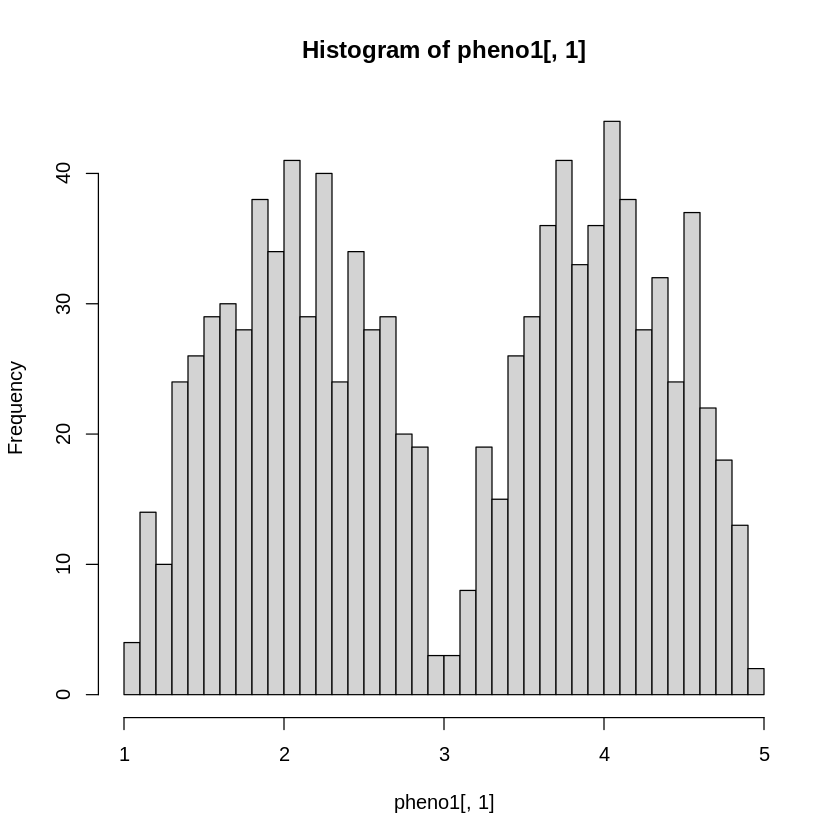

In [ ]:
# make a histogram of the first replicate (first column) of pheno1, describe what could possibly be going on genetically, use hist() and set breaks to 50


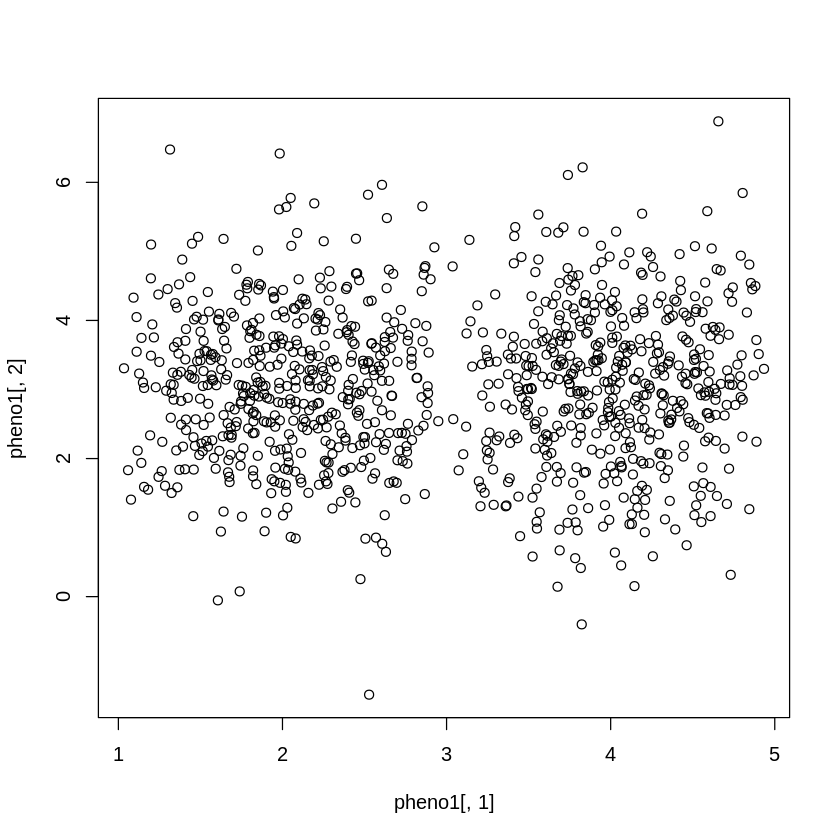

In [ ]:
# make a scatterplot of the two replicates of pheno1 and calculate the Pearson correlation


In [ ]:
# here the Pearson correlation is a measure of Broad-sense heritability (H^2) and captures effects of strain (effects of segregant) including additive, non-additive and other strain effects

# calculate the Pearson correlation between the replicates

# What can you conclude about the heritability of this trait and how do you reconcile the heritability estimate and the histogram you observed above?

[1] 0.01171634

In [ ]:
#standardize each of the two replicates and call the standardized matrix spheno1, hint scale()




Call:
lm(formula = spheno1[, 2] ~ spheno1[, 1] - 1)

Coefficients:
spheno1[, 1]  
     0.01172  


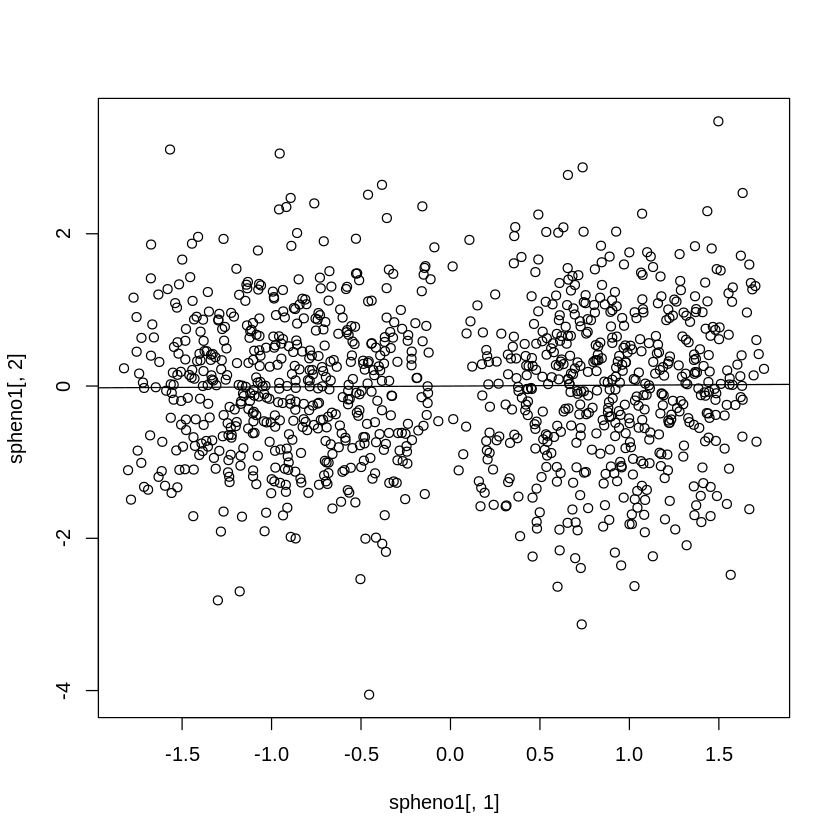

In [ ]:
#make a scatterplot of spheno[,1] (x-axis) vs spheno[,2] (y-axis)

#fit a ordinary least squares model without an intercept where y=spheno[,2] and x=spheno[,1] (y=mx) solve for m

#visualize the results on the plot

#what is special about the slope estimate?


In [ ]:
#@title Trait 2
#perform the same analyses here as above for the first two replicates of pheno2
pheno2=readRDS(url('https://github.com/joshsbloom/ComplexTraitTools/blob/main/VarianceComponents/simulations/pheno2.RDS?raw=true'))


[1] 0.5607529

In [ ]:
# reformat from wide to long, three columns, first column seg.name, second column replicate name, third column phenotype, like such:
# pheno2.long
#   seg.name replicate phenotype
#   <chr>    <chr>         <dbl>
# 1 seg1        sim1         -6.07
# 2 seg1        sim2         -8.98
# 3 seg1        sim3         -6.06
# 4 seg2        sim1         -0.281
# use pivot_longer from tidyr if you'd like
# call the new variable pheno2.long



In [ ]:
#@title Heritability deep dive start
#https://en.wikipedia.org/wiki/Intraclass_correlation#Modern_ICC_definitions:_simpler_formula_but_positive_bias
#optional skip

# use a standard ANOVA to calculate broad-sense heritability
ares=anova(lm(phenotype~seg.name-1, data=pheno2.long))
r= 3 # of reps = 3
#EMS_Seg=MeanSq_Seg=sigmaEsq+r*sigmaAsq
#EMS_Resid=MeanSq_Resid=sigmaEsq
sigmaEsq=ares$"Mean Sq"[2]
sigmaGsq=(ares$"Mean Sq"[1]-sigmaEsq)/r
H2=sigmaGsq/(sigmaGsq+sigmaEsq)

H2

[1] 0.5617286

In [ ]:
#optional skip
#equivalent here to lmer based mixed model
#calculate broad-sense heritability using a linear mixed model
rlmerH2=lmer(phenotype~(1|seg.name),data=pheno2.long)
sigmaAsq=VarCorr(rlmerH2)[[1]][1,1]
sigmaEsq=attr(VarCorr(rlmerH2), 'sc')^2
H2=sigmaGsq/(sigmaGsq+sigmaEsq)
H2


[1] 0.5617468

In [ ]:
#optional skip
# calculate broad-sense heritability using a linear mixed model with specified variance-covariance structure,
# where you explicitly specify the structure of the variance-covariance terms
#
# For heritability analyses a common assumption is the phenotype values comes from a multivariate normal distribution.
# Describe how we are parameterizing this multivariate normal distribution and what we are trying to estimate.
Z=model.matrix(~seg.name-1,data=pheno2.long)
colnames(Z)=gsub('seg.name', '', colnames(Z))
ZtZ=Z%*%t(Z)
Ze=diag(nrow(pheno2.long))
meModel=regress(phenotype~1,~ZtZ+Ze,verbose=T, identity=F, data=pheno2.long)
summary(meModel)
H2=meModel$sigma[1]/sum(meModel$sigma)
H2

start algorithm at 27.9979 27.9979 
1 sigma = 27.99794 27.99794 resid llik = -7142.327 
1 adjusted sigma = 26.26014 26.26014
2 sigma = 28.87477 25.3886 resid llik = -7137.471 
2 adjusted sigma = 28.81311 25.33438 delta.llik = 4.856242 
3 sigma = 30.68561 24.76254 resid llik = -7136.068 
3 adjusted sigma = 30.6725 24.75197 delta.llik = 1.403014 
4 sigma = 31.4058 24.54114 resid llik = -7135.935 
4 adjusted sigma = 31.4053 24.54075 delta.llik = 0.1329794 
5 sigma = 31.47881 24.52009 resid llik = -7135.933 
5 adjusted sigma = 31.4788 24.52009 delta.llik = 0.001305339 
6 sigma = 31.48613 24.51804 resid llik = -7135.933 
6 adjusted sigma = 31.48613 24.51803 delta.llik = 1.29443e-05 


Likelihood kernel: K = (Intercept)

Maximized log likelihood with kernel K is  -7135.933 

Linear Coefficients:
             Estimate Std. Error
 (Intercept)    0.008      0.198

Variance Coefficients:
             Estimate Std. Error
         ZtZ   31.487      1.787
         Ze    24.518      0.773


ZtZ 
0.5622183

In [ ]:
#optional skip
#calculate the additive relatedness matrix (GRM)
A=tcrossprod(scale(gdata))/(ncol(gdata)-1)
#make sure order of A matches order of Z
A=A[colnames(Z),colnames(Z)]


In [ ]:
#@title Heritability deep dive end
#optional skip
#calculate two component mixed model with strain repeatibility and additive terms
ZAtZ=Z%*%A%*%t(Z)

bigModel=regress(phenotype~1,~ZAtZ+ZtZ+Ze,verbose=T, pos=c(T,T,T), identity=F,data=pheno2.long)

#interpret what the terms in this model mean

#pretty close, error on the additive term isn't helping
H2=(bigModel$sigma[1]+bigModel$sigma[2])/sum(bigModel$sigma)
H2
summary(bigModel)

1 sigma = 55.99587 55.99587 55.99587 resid llik = -6940.208 
1 adjusted sigma = 20.91296 20.91296 20.91296
2 sigma = 21.66953 15.29032 22.79595 resid llik = -6902.327 
2 adjusted sigma = 21.02458 14.83523 22.11747 delta.llik = 37.88074 
3 sigma = 22.19909 10.62058 23.86377 resid llik = -6883.547 
3 adjusted sigma = 21.7926 10.42611 23.4268 delta.llik = 18.77981 
4 sigma = 22.85956 8.231311 24.42992 resid llik = -6879.557 
4 adjusted sigma = 22.73308 8.185769 24.29476 delta.llik = 3.989872 
5 sigma = 23.11299 7.715208 24.49641 resid llik = -6879.385 
5 adjusted sigma = 23.10631 7.712977 24.48932 delta.llik = 0.1718268 
6 sigma = 23.19574 7.644832 24.51498 resid llik = -6879.382 
6 adjusted sigma = 23.19559 7.644783 24.51483 delta.llik = 0.00351255 
7 sigma = 23.21333 7.636027 24.51751 resid llik = -6879.382 
7 adjusted sigma = 23.21332 7.636026 24.51751 delta.llik = 6.283262e-05 


ZAtZ 
0.5571946

Likelihood kernel: K = (Intercept)

Maximized log likelihood with kernel K is  -6879.382 

Linear Coefficients:
             Estimate Std. Error
 (Intercept)    0.008      0.125

Variance Coefficients:
             Estimate Std. Error
        ZAtZ   23.217      3.057
        ZtZ     7.635      0.933
        Ze     24.518      0.773


In [ ]:
#calculate the average phenotype for each segregant across the replicates use tidyverse, pipes, group_by and summarise, make sure you explicitly handle NAs


In [ ]:
#make sure the order of the averaged phenotypes matches the segregant order in the genotype matrix (this is very important here and generally!)



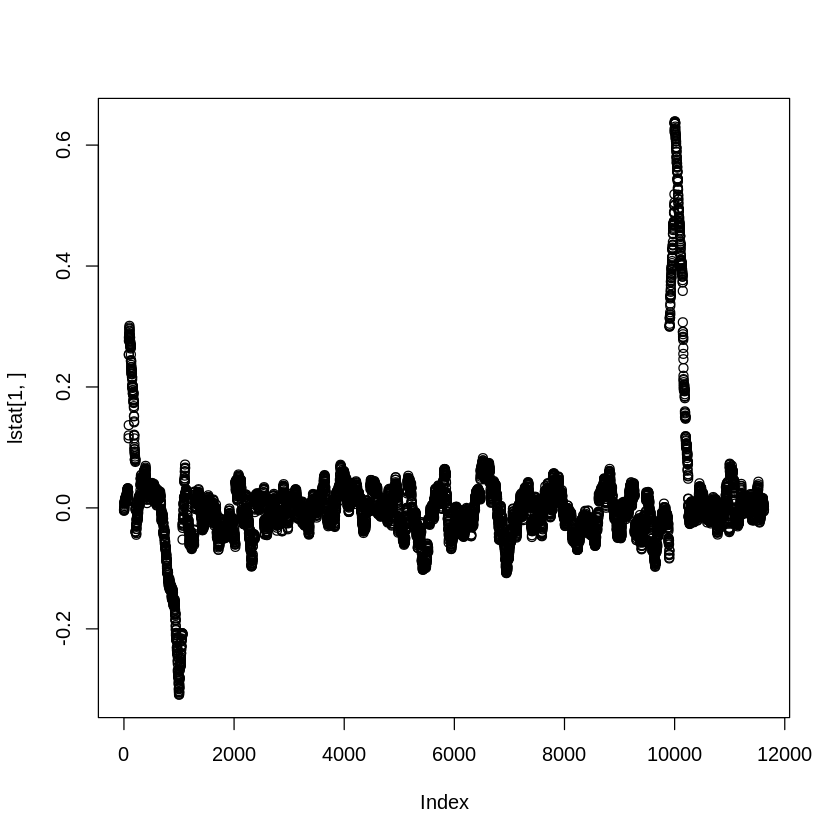

In [ ]:
#@title QTL mapping start
#calculate a linkage mapping statistic  between the average phenotype and each marker across the genome
# use pearson R as the statistic
# visualize the results (x-axis marker index, y-axis Pearson R)


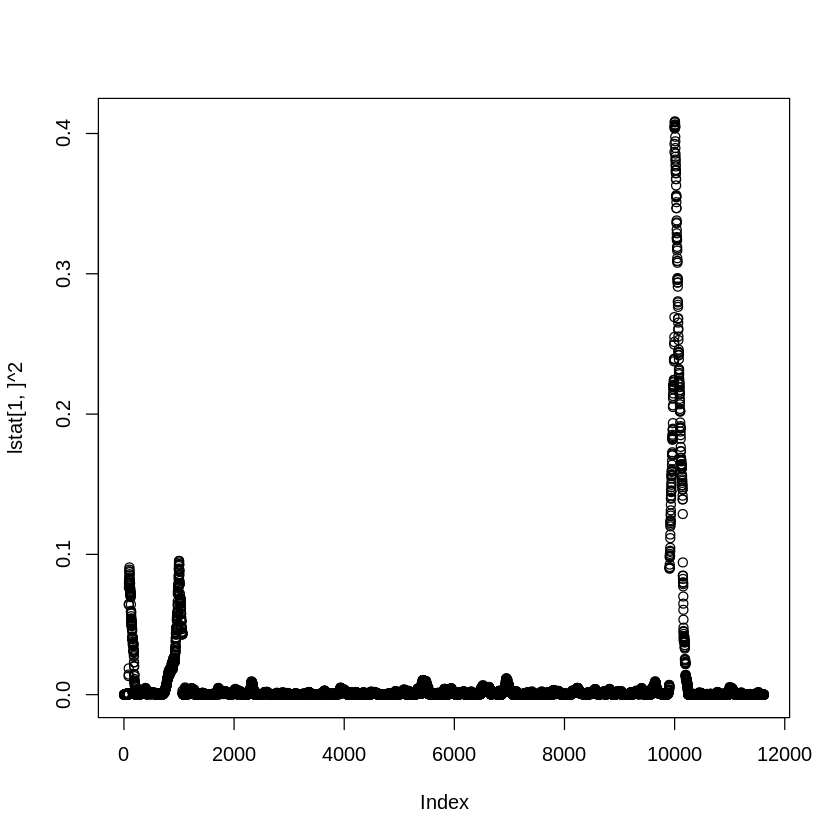

In [ ]:
# visualize the results without the sign information (x-axis marker index, y-axis Pearson R^2)


In [ ]:
#what is the position of the marker with the largest statistic


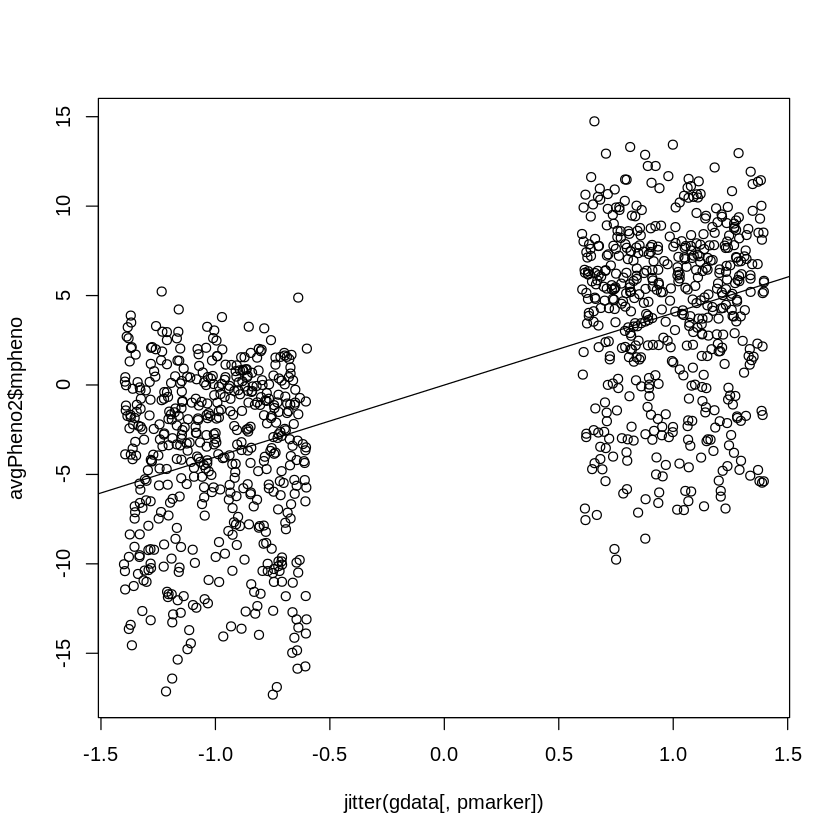

In [ ]:
#plot genotype vs phenotype at that marker, jitter the x-axis, and overlay the best fit regression line


In [ ]:
#what is the mean difference between the RM and BY allele at this position?
#see if you can use lm() to figure this out, and interpret the coefficient from a linear model without an intercept



gdata[, pmarker] 
        8.047292

In [ ]:
#split the data by the two genotypes and calculate the means for each group



95% 
0.0161776

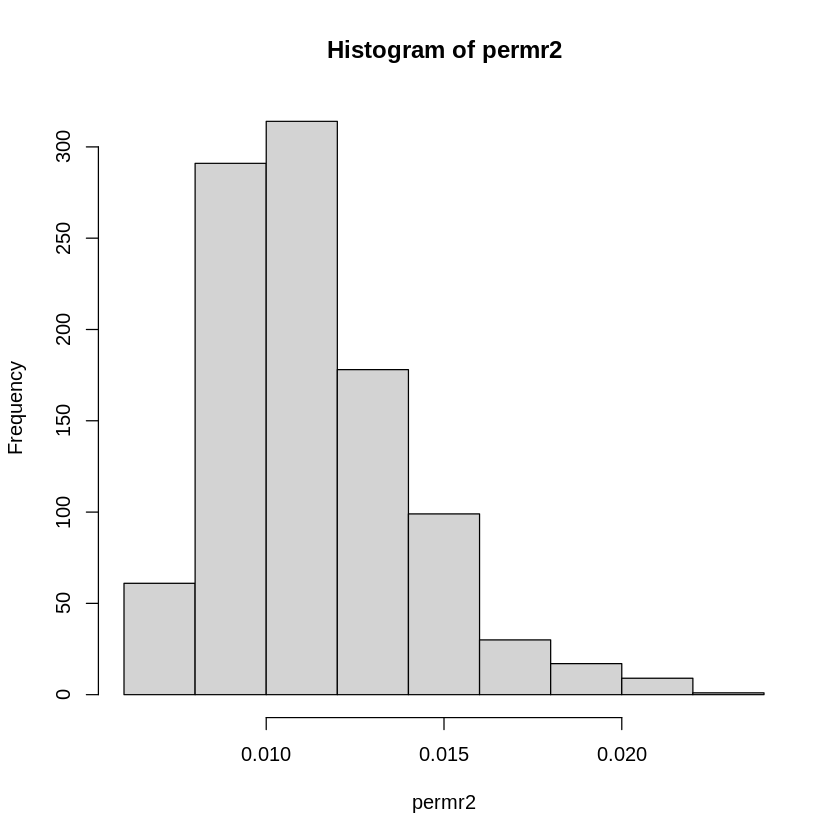

In [ ]:
#@title Calculating significance threshold, adjusting for multiple hypothesis testing
# calculate the 5% FWER threshold for the statistic r^2
# see Churchill 1994

# permute the assignment of phenotype to genotype, recalc r^2 across the genome, for each permutation retain the max r^2 across the genome
# generate a distribution of 1000 such permutation r^2 values


# make a histogram of the distribution of max r^2 values from the 1000 permutations

# find the r^2 value such that only 5% of values above it would be expected by chance


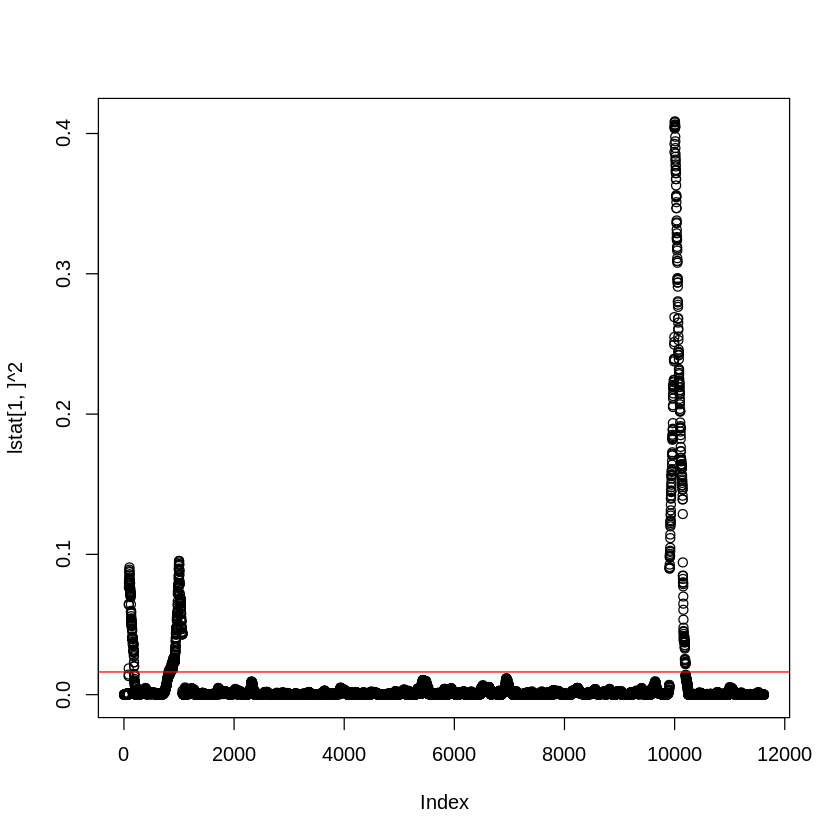

In [ ]:

#visualize this threshold on the plot of the marker index vs Pearson R^2 genomewide

#how many significant QTL are there?



95% 
3.569981

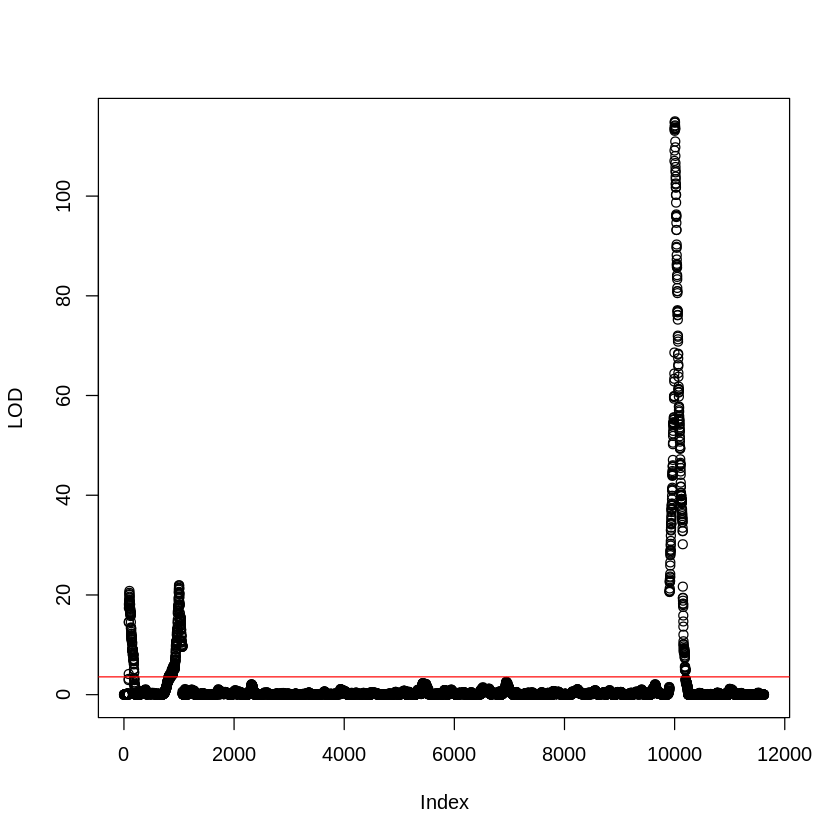

In [ ]:
#use the following identity to convert r to LOD score

toLOD=function(nstrains, r2){  return(-nstrains*log(1-r2)/(2*log(10)))  }

#visualize the linkage mapping statisticplot(LOD)


#convert the FWER threshold to a LOD threshold



In [ ]:
#Calculate a 1.5 LOD drop confidence interval for each QTL and interpret the intervals



In [ ]:
#make a matrix where the column vectors are just the QTL peak markers

#individually test for interactions effects (epistasis) between each of the detected QTL markers. Hint, use drop1() with test='Chisq'

#which QTL have significant interaction effects, if any?



`geom_smooth()` using formula = 'y ~ x'


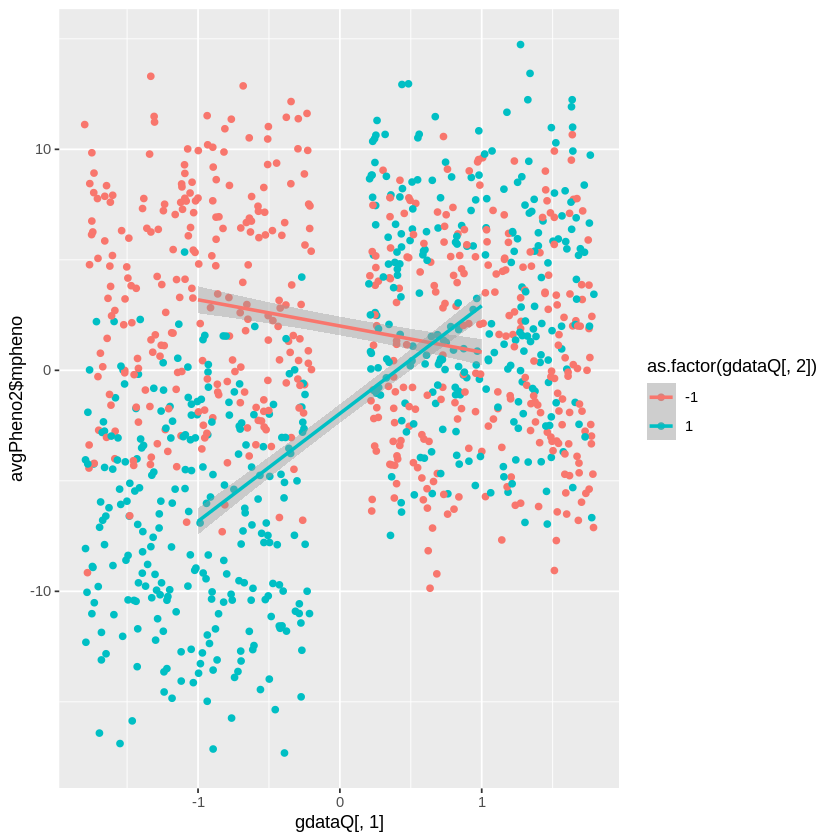

In [ ]:
#visualize any significant interaction effects with a jitter plot of (genotype 1) of QTL on the x-axis, phenotype on the y-axis, and color of (genotype 2)
# explain what this plot means




In [ ]:
#how much variance is explained by all the detected QTL using just the first replicate of pheno2 in the model, only include additive QTL effects



In [ ]:
#how much variance is explained by all the detected QTL using just the first replicate of pheno2 in the model
# include any additional significant non-additive effects in the model
